<a href="https://colab.research.google.com/github/alejotoro-o/cff-formation-control/blob/main/CFF_sim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
def cf_func(z, alpha=1, func="const"):

    match func:
        case 'const':
            f = 1
        case 'poly':
            f = (1 - alpha)*z**2 + 1
        case 'sin':
            f = np.sin((1 - alpha)*z)**2 + 1
        case 'log':
            f = np.log((1 - alpha)*z**2 + 1)**2 + 1
        case _:
            f = 1

    return f

In [ ]:
Z = []
E = []
t_sim = 0

T_s = 0.01
t_f = 12
e = np.zeros((6,2))

## Initial positions
z1 = np.array([-0.6, -1.1])
z2 = np.array([0.6, -1.1])
z3 = np.array([0.6, 0])
z4 = np.array([0.6, 1.1])
z5 = np.array([-0.6, 1.1])
z6 = np.array([-0.6, 0])
z = [
    z1,
    z2,
    z3,
    z4,
    z5,
    z6
]
Z.append(np.array(z))

M = [
    [z2],
    [z3],
    [z4],
    [z5],
    [z6],
    [z1]
]

## Desired positions
c21 = np.array([2, 0])
c32 = np.array([0, 4])
c43 = np.array([0, -2])
c54 = np.array([-2, 2])
c65 = np.array([0, -2])
c16 = np.array([0, -2])
c = [
    [c21],
    [c32],
    [c43],
    [c54],
    [c65],
    [c16]
]

## V(i,j) params
n = 30
d = 1

## CFF params
alpha = 0.5
cf = "const"

## Calculate derivative of function V(ij)
def cal_dV(zi, zj, B, n=30, d=1):

    if B <= d**2:
        dV = 2*(zi - zj)*((2*n*(B - d**2))/((B**3)*(d**2)))
    else:
        dV = 0

    return dV

for t in np.arange(0, t_f, T_s):

    ## Loop through N
    for ni, zi in enumerate(z):

        ## Calculate P_Gamma
        p_gamma = 0
        for zj in M[ni]:
            c_sum = 0
            for cji in c[ni]:
                c_sum += cji
            p_gamma += zi - (zj + c_sum)

        e[ni] = p_gamma

        ## Calculate dV
        dV = 0
        for zj in z:

            if (zj != zi).all():

                ## Calculate B(i,j)
                B = np.linalg.norm(zi - zj)
                ## Calculate dV
                dV += cal_dV(zi, zj, B, n ,d)

        ## Control law for agent i
        ui = -cf_func(z=zi, alpha=alpha, func=cf)*(p_gamma + dV)

        ## Update agent i position
        z[ni] = z[ni] + T_s*ui

        ## Update M
        M[ni] = [z[(ni + 1) if ni < (len(z) - 1) else 0]]

    Z.append(np.array(z))
    E.append(np.array(e))

    t_sim += T_s

Z = np.array(Z)
E = np.array(E)

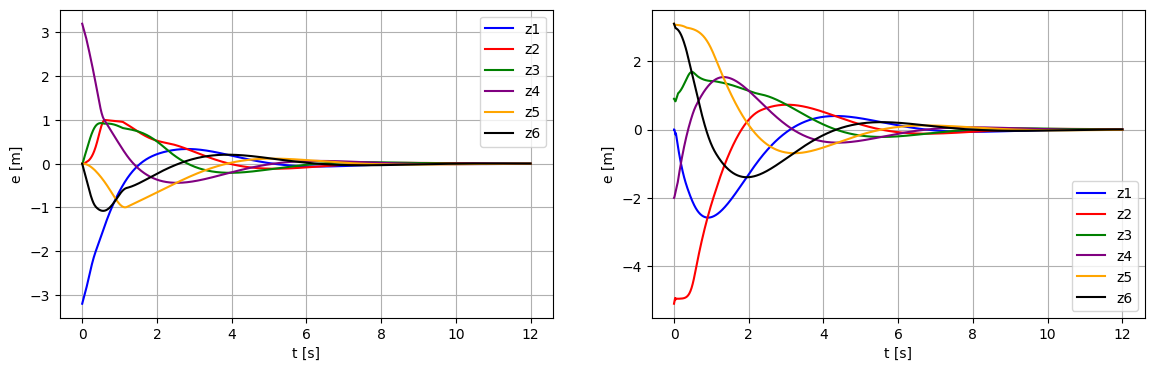

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(14,4))
colors = ["blue", "red", "green", "purple", "orange", "black"]
t = np.linspace(0,t_sim,np.round(t_sim/T_s).astype(int))

for idx, ax in enumerate(axs):

  for i in range(len(e)):

    ax.plot(t,E[:,i,idx], color=colors[i], label="z"+str(i+1))

  ax.set_xlabel("t [s]")
  ax.set_ylabel("e [m]")

  ax.grid()
  ax.legend()

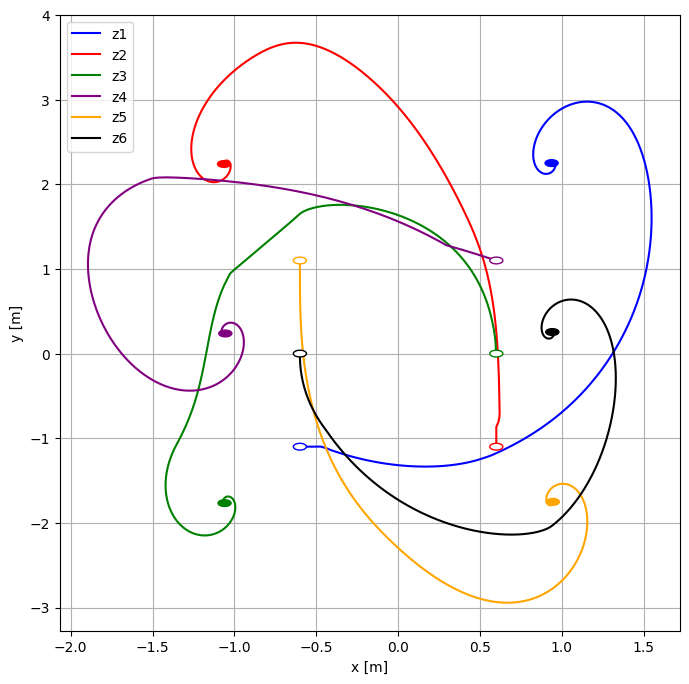

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
r = 0.04
lw = 1
colors = ["blue", "red", "green", "purple", "orange", "black"]

for i in range(len(z)):

  ax.plot(Z[:,i,0],Z[:,i,1], color=colors[i], label="z"+str(i+1))

  start_z = matplotlib.patches.Circle(Z[0,i,:], radius=r, color=colors[i], fill=True, lw=lw, fc="white", zorder=10)
  ax.add_patch(start_z)
  end_z = matplotlib.patches.Circle(Z[-1,i,:], radius=r, color=colors[i], fill=True, lw=lw)
  ax.add_patch(end_z)

ax.set_xlabel("x [m]")
ax.set_ylabel("y [m]")

ax.grid()
ax.legend()

Save animation

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.patches as patches
# import matplotlib.animation as animation

# # --- Setup figure ---
# fig, ax = plt.subplots(figsize=(8, 8))
# colors = ["blue", "red", "green", "purple", "orange", "black"]

# # Square limits with aspect = 1
# # --- Square limits with equal scaling ---
# x_min, x_max = Z[:, :, 0].min(), Z[:, :, 0].max()
# y_min, y_max = Z[:, :, 1].min(), Z[:, :, 1].max()

# # Compute ranges
# x_range = x_max - x_min
# y_range = y_max - y_min
# max_range = max(x_range, y_range) / 2

# # Center
# x_mid = (x_max + x_min) / 2
# y_mid = (y_max + y_min) / 2

# # Square limits
# ax.set_xlim(x_mid - max_range - 0.5, x_mid + max_range + 0.5)
# ax.set_ylim(y_mid - max_range - 0.5, y_mid + max_range + 0.5)
# ax.set_aspect("equal", adjustable="box")

# ax.grid()

# lines, points = [], []
# N = Z.shape[1]

# # Plot lines + moving points
# for i in range(N):
#     (line,) = ax.plot([], [], lw=1.5, color=colors[i % len(colors)], label=f"z{i+1}")
#     (pt,) = ax.plot([], [], 'o', ms=6, color=colors[i % len(colors)])
#     lines.append(line)
#     points.append(pt)

# # --- Start patches (white circles) ---
# r, lw = 0.04, 1
# for i in range(N):
#     start_patch = patches.Circle(
#         Z[0, i, :], radius=r, ec=colors[i % len(colors)],
#         fc="white", lw=lw, zorder=10
#     )
#     ax.add_patch(start_patch)

# ax.legend()

# # --- Init + Update ---
# def init():
#     for line, pt in zip(lines, points):
#         line.set_data([], [])
#         pt.set_data([], [])
#     return lines + points

# def update(frame):
#     for i, (line, pt) in enumerate(zip(lines, points)):
#         # trajectory up to current frame
#         line.set_data(Z[:frame+1, i, 0], Z[:frame+1, i, 1])
#         # current agent position
#         pt.set_data([Z[frame, i, 0]], [Z[frame, i, 1]])
#     return lines + points

# # --- Animation ---
# frames = Z.shape[0]
# duration = 12  # seconds (simulation time)
# interval = duration * 1000 / frames  # ms per frame

# ani = animation.FuncAnimation(
#     fig, update, frames=frames, init_func=init,
#     interval=interval, blit=False, repeat=False
# )

# # Save as mp4
# ani.save("formation2.mp4", writer="ffmpeg", fps=1000/interval)